In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as datetime

In [2]:
 plt.rcParams["font.family"] = "sans-serif"

In [3]:
df = pd.read_json('history.jsonl', lines=True)

In [4]:
# expand out collapsed columns
df = pd.concat([df, pd.DataFrame((col for col_name, col in df['data'].iteritems()))], axis='columns')
df = df.drop('data', axis='columns')

In [5]:
df['fullname'] = df.kind + '_' + df.id

In [6]:
df['kind'] = df['kind'].replace('t1', 'comment').replace('t3', 'post')

In [7]:
cols_to_keep = [
    'kind',
    'created_utc',
    'score',
    'body',
    'is_submitter',
    'distinguished',
    'subreddit',
    'selftext',
    'title',
    'url',
]

In [8]:
df = df.drop([c for c in df.columns if c not in cols_to_keep], axis='columns')

In [9]:
df['created_utc'] = pd.to_datetime(df.created_utc, unit='s')

In [10]:
df.index = df.created_utc

In [11]:
df = df.sort_index(ascending=True) # must be ascending for rolling functions

In [12]:
df

,kind,created_utc,score,body,is_submitter,distinguished,subreddit,selftext,title,url
created_utc,,,,,,,,,,
2013-03-05 10:10:10,post,2013-03-05 10:10:10,4,NaN,NaN,None,wildernessmedicine,Last summer I took got my WFR with Remote Medi...,Ideas for Continuing to Practice Skills,https://old.reddit.com/r/wildernessmedicine/co...
2013-03-27 19:39:12,post,2013-03-27 19:39:12,16,NaN,NaN,None,Seattle,,Seattle considering a bid for the 2024 Summer ...,http://blog.seattlepi.com/seattlesports/2013/0...
2013-05-01 06:49:11,post,2013-05-01 06:49:11,17,NaN,NaN,None,canyoneering,,"Rappelling into the Jug of Salome Creek, Az",https://www.dropbox.com/sh/7f2gdx5q2hvaghj/bMU...
2013-05-09 05:37:18,post,2013-05-09 05:37:18,8,NaN,NaN,None,canyoneering,,Down The Line - Canyoneering outside of Vancou...,http://vimeo.com/64671839
2013-06-13 11:07:32,post,2013-06-13 11:07:32,3,NaN,NaN,None,photography,So I've reached a point in my photography wher...,What to do with my pictures?,https://old.reddit.com/r/photography/comments/...
...,...,...,...,...,...,...,...,...,...,...
2021-03-28 18:53:29,comment,2021-03-28 18:53:29,2,Doesn't look too slow to me 😉,False,None,skiing,NaN,NaN,NaN
2021-03-31 06:13:22,comment,2021-03-31 06:13:22,1,This comment has been removed as it violates R...,False,moderator,photocritique,NaN,NaN,NaN
2021-04-01 17:46:46,comment,2021-04-01 17:46:46,34,Baja blast edition lmao,False,None,subaru,NaN,NaN,NaN


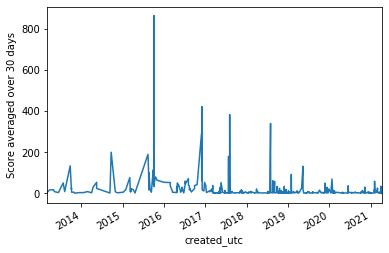

In [24]:
df.score.rolling(window='1D').mean().plot()
plt.ylabel('Score averaged over 30 days')
plt.show()

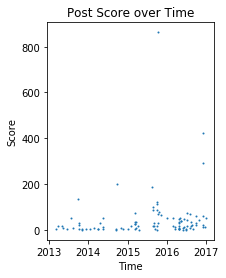

In [51]:
plt.figure(figsize=(3, 4))

plt.scatter(y=df.loc[df.created_utc<datetime(2017, 1, 1), 'score'], x=df.loc[df.created_utc<datetime(2017, 1, 1), 'created_utc'], s=1)

plt.ylim()

plt.xticks([datetime(y, 1, 1) for y in range(2013, 2018)], [str(y) for y in range(2013, 2018)])

plt.title('Post Score over Time')
plt.xlabel('Time')
plt.ylabel('Score')
plt.show()

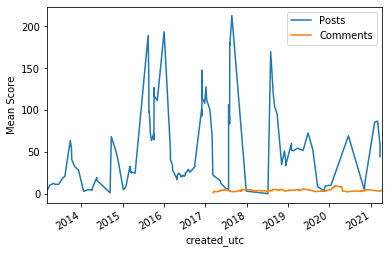

In [21]:
df.loc[(df.kind=='post'   ) & (df.distinguished!='moderator'), 'score'].rolling(window='90D').mean().plot(label='Posts')
df.loc[(df.kind=='comment') & (df.distinguished!='moderator'), 'score'].rolling(window='90D').mean().plot(label='Comments')
plt.legend()
plt.ylabel('Mean Score')

plt.show()

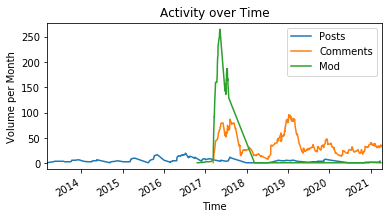

In [23]:
plt.figure(figsize=(6, 3))


df.loc[(df.kind=='post'   ) & (df.distinguished!='moderator'), 'score'].rolling(window='90D').count().plot(label='Posts')
df.loc[(df.kind=='comment') & (df.distinguished!='moderator'), 'score'].rolling(window='90D').count().plot(label='Comments')
df.loc[df.distinguished=='moderator', 'score'].                         rolling(window='90D').count().plot(label='Mod')
plt.legend()
plt.ylabel('Volume per Month')
plt.title('Activity over Time')
plt.xlabel('Time')
plt.show()

In [16]:
df.loc[(df.kind=='comment') & (df.distinguished!='moderator'),'subreddit'].value_counts()

photocritique         89
SeattleWA             57
photography           49
AnalogCommunity       41
largeformat           39
                      ..
ImagesOfWashington     1
tradclimbing           1
VacationColorado       1
Whatcouldgowrong       1
RemarkableTablet       1
Name: subreddit, Length: 63, dtype: int64

In [17]:
df.loc[df.kind=='post','subreddit'].value_counts()

unitedstatesofamerica    25
EarthPorn                17
Seattle                  10
photocritique            10
skiing                    8
analog                    7
photography               7
LandscapeAstro            5
AnalogCommunity           5
AbstractPhotos            4
Backcountry               4
SeattleWA                 4
largeformat               4
subaru                    4
canyoneering              3
Adirondacks               3
telephotolandscapes       2
phcritiquetest            2
cars                      2
pushshift                 2
SonyAlpha                 2
hackintosh                2
inbox                     1
SampleSize                1
aww                       1
bicycling                 1
ricohGR                   1
travel                    1
amateurradio              1
udub                      1
me_irl                    1
coloradohikers            1
alpinism                  1
2Seattle2Furious          1
M43                       1
VacationColorado    

In [18]:
df.kind.value_counts()

comment    999
post       156
Name: kind, dtype: int64

In [19]:
df.score.value_counts().sort_index(ascending=False)

 1143      1
 863       1
 707       1
 421       1
 339       1
        ... 
 3        97
 2       162
 1       596
 0        10
-2         1
Name: score, Length: 78, dtype: int64

In [52]:
df.loc[df.created_utc<datetime(2017, 1, 1), 'subreddit'].value_counts()

unitedstatesofamerica    25
EarthPorn                13
Seattle                   9
skiing                    6
photography               5
subaru                    4
analog                    3
LandscapeAstro            3
photocritique             3
AbstractPhotos            2
hackintosh                2
canyoneering              2
cars                      2
SonyAlpha                 2
UnexpectedRemixes         1
ricohGR                   1
bicycling                 1
PNWhiking                 1
ClimbingPorn              1
moto360                   1
M43                       1
inbox                     1
Adirondacks               1
wildernessmedicine        1
PeruPics                  1
alpinism                  1
me_irl                    1
Backcountry               1
aww                       1
pics                      1
Name: subreddit, dtype: int64

In [56]:
df.loc[df.created_utc<datetime(2017, 1, 1), 'score'].mean(), df.loc[df.created_utc<datetime(2017, 1, 1), 'score'].median(), df.loc[df.created_utc<datetime(2017, 1, 1), 'score'].std()

(47.24742268041237, 18.0, 103.09876241253609)

In [63]:
df.loc[df.created_utc<datetime(2017, 1, 1)].sort_values(by='score').iloc[-1]

kind                                                          post
created_utc                                    2015-10-06 02:40:07
score                                                          863
body                                                           NaN
is_submitter                                                   NaN
distinguished                                                 None
subreddit                                                  Seattle
selftext                                                          
title            This photo always makes me happy – A satellite...
url                                 http://i.imgur.com/QJmN49t.jpg
Name: 2015-10-06 02:40:07, dtype: object

In [73]:
print(
    '\n'.join( ('/r/' + df.loc[df.created_utc>datetime(2018, 1, 1), 'subreddit'].value_counts()[:10].index).tolist() )
)

/r/AnalogCommunity
/r/largeformat
/r/SeattleWA
/r/photocritique
/r/PNWhiking
/r/photography
/r/amateurradio
/r/Backcountry
/r/pushshift
/r/analog


In [72]:
('/r/' + df.loc[df.created_utc>datetime(2018, 1, 1), 'subreddit'].value_counts()[:10].index)

Index(['/r/AnalogCommunity', '/r/largeformat', '/r/SeattleWA',
       '/r/photocritique', '/r/PNWhiking', '/r/photography', '/r/amateurradio',
       '/r/Backcountry', '/r/pushshift', '/r/analog'],
      dtype='object')